.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [48]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')

preparing data

In [49]:
city_temp=pd.read_csv("../data/raw/temperature.csv")
city_humid=pd.read_csv("../data/raw/humidity.csv")
city_press=pd.read_csv("../data/raw/pressure.csv")
city_speed=pd.read_csv("../data/raw/wind_speed.csv")
city_dir=pd.read_csv("../data/raw/wind_direction.csv")
city_temp.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
6818,2013-07-12 14:00:00,287.30,284.585,285.725,285.737,293.252,292.697,301.95,300.837,293.002,...,297.482,298.94,294.725,297.22,302.692000,301.66,311.150,299.417000,299.417000,301.042
13992,2014-05-07 12:00:00,281.35,278.040,283.260,280.140,284.830,284.610,286.15,286.230,286.940,...,284.530,284.01,279.410,283.59,291.815000,299.50,306.480,294.260000,296.480000,300.846
12235,2014-02-23 07:00:00,273.81,277.540,282.770,278.010,285.180,284.870,284.38,286.600,277.020,...,278.130,275.14,270.640,278.34,288.610667,290.64,287.644,290.785667,290.785667,290.150
26460,2015-10-09 00:00:00,290.31,295.500,301.010,292.530,303.610,300.020,304.72,304.590,286.500,...,289.260,289.18,280.100,283.30,293.210000,297.98,290.610,300.930000,295.285000,298.610
24208,2015-07-07 04:00:00,294.58,297.220,292.020,293.130,292.630,291.780,300.60,306.620,291.070,...,296.790,296.13,294.320,293.25,293.325000,296.77,300.150,302.040000,296.375000,296.930


For each city we have timeseries in a column. We are going to chose Montreal as our chosen city and temperature as our chosen feature. It is better to convert the temperature to Celsius.

In [50]:
data=city_temp[['datetime','Montreal']]
data=data.rename(columns={'Montreal':'temperature'})
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,285.830000
2,2012-10-01 14:00:00,285.834650
3,2012-10-01 15:00:00,285.847790
4,2012-10-01 16:00:00,285.860929


In [51]:
data_humid=city_humid[['datetime','Montreal']]
data_humid=data_humid.rename(columns={'Montreal':'humidity'})
data_humid.head(5)


,datetime,humidity
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,93.0
2,2012-10-01 14:00:00,91.0
3,2012-10-01 15:00:00,87.0
4,2012-10-01 16:00:00,84.0


In [46]:
city_press.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
40931,2017-06-02 23:00:00,1019.0,1016.0,1014.0,1018.0,1011.0,1011.0,1011.0,1007.0,1018.0,...,1014.0,1012.0,1012.0,1016.0,987.0,1014.0,970.0,1025.0,1025.0,1014.0
8098,2013-09-03 22:00:00,1029.0,1028.0,1027.0,1029.0,1024.0,1023.0,1023.0,1021.0,1024.0,...,1022.0,1021.0,1018.0,1019.0,1024.0,1024.0,1024.0,1023.0,1023.0,1024.0
4885,2013-04-23 01:00:00,1100.0,1025.0,1012.0,1025.0,1014.0,1016.0,1011.0,1012.0,1016.0,...,1035.0,1036.0,1041.0,1033.0,965.0,1012.0,1015.0,1013.0,1012.0,1020.0
5538,2013-05-20 06:00:00,NaN,1025.0,1016.0,1026.0,1015.0,1017.0,1010.0,NaN,NaN,...,1025.0,1025.0,1023.0,1025.0,966.0,1013.0,1012.0,1014.0,1014.0,988.0
34094,2016-08-22 02:00:00,1011.0,1014.0,1013.0,1014.0,1011.0,1011.0,1008.0,1008.0,1021.0,...,1010.0,1008.0,1007.0,1010.0,983.0,1010.0,967.0,1021.0,1021.0,1010.0


In [34]:
data_press=city_press[['datetime','Montreal']]
data_press=data_press.rename(columns={'Montreal':'pressure'})
data_press.head(5)

,datetime,pressure
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,1001.0
2,2012-10-01 14:00:00,986.0
3,2012-10-01 15:00:00,945.0
4,2012-10-01 16:00:00,904.0


In [37]:
data_speed=city_speed[['datetime','Montreal']]
data_speed=data_speed.rename(columns={'Montreal':'wind_speed'})
data_speed.head(5)

,datetime,wind_speed
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,4.0
2,2012-10-01 14:00:00,4.0
3,2012-10-01 15:00:00,4.0
4,2012-10-01 16:00:00,4.0


In [39]:
data_dir=city_dir[['datetime','Montreal']]
data_dir=data_dir.rename(columns={'Montreal':'wind_direction'})
data_dir.head(5)

,datetime,wind_direction
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,230.0
2,2012-10-01 14:00:00,230.0
3,2012-10-01 15:00:00,231.0
4,2012-10-01 16:00:00,233.0


In [40]:
data["temperature"].describe()


count    45250.000000
mean       280.343010
std         11.953626
min        243.300000
25%        271.971750
50%        281.109000
75%        290.369583
max        307.880000
Name: temperature, dtype: float64

In [41]:
data["temperature"]=data["temperature"] - 273.15



In [42]:
data.head(5)pd.concat([data,data_humid['humidity']], axis=1)

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,12.680000
2,2012-10-01 14:00:00,12.684650
3,2012-10-01 15:00:00,12.697790
4,2012-10-01 16:00:00,12.710929


In [60]:
pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction']], axis=1)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,285.830000,93.0,1001.0,4.0,230.0
2,2012-10-01 14:00:00,285.834650,91.0,986.0,4.0,230.0
3,2012-10-01 15:00:00,285.847790,87.0,945.0,4.0,231.0
4,2012-10-01 16:00:00,285.860929,84.0,904.0,4.0,233.0
5,2012-10-01 17:00:00,285.874069,80.0,863.0,3.0,234.0
6,2012-10-01 18:00:00,285.887208,76.0,822.0,3.0,236.0
7,2012-10-01 19:00:00,285.900348,72.0,NaN,3.0,237.0
8,2012-10-01 20:00:00,285.913487,68.0,NaN,3.0,238.0
9,2012-10-01 21:00:00,285.926627,64.0,NaN,3.0,240.0


we havesome missing value. Temperature tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop he rest.

In [43]:
data = data.fillna(method = 'bfill', axis=0).dropna()

In [44]:
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,12.680000
1,2012-10-01 13:00:00,12.680000
2,2012-10-01 14:00:00,12.684650
3,2012-10-01 15:00:00,12.697790
4,2012-10-01 16:00:00,12.710929


There is no missing value and there is no outlayer so our daa looks good.

count    45253.000000
mean         7.192744
std         11.953399
min        -29.850000
25%         -1.180000
50%          7.959000
75%         17.218333
max         34.730000
Name: temperature, dtype: float64


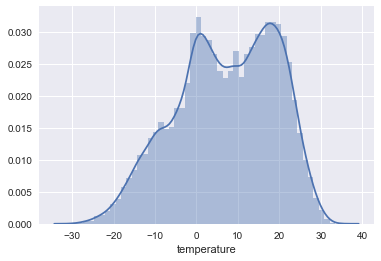

In [46]:
print(data.temperature.describe())
plot = sns.distplot(data.temperature)